## **Student Performance (Multiple Linear Regression)**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [82]:
import pandas as pd
df = pd.read_csv('/Users/fuadbudul/Documents/Data files/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Explore the data

In [83]:
print(f'The number of rows in the dataset is: {df.shape[0]}')
print(f'The number of columns in the dataset is: {df.shape[1]}')


The number of rows in the dataset is: 10000
The number of columns in the dataset is: 6


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [85]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [86]:
len(df[df.duplicated()])    

127

## there 127 that are duplicate

In [87]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [88]:
#numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(f'The numeric columns in the dataset are: {numeric_columns}')

The numeric columns in the dataset are: Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


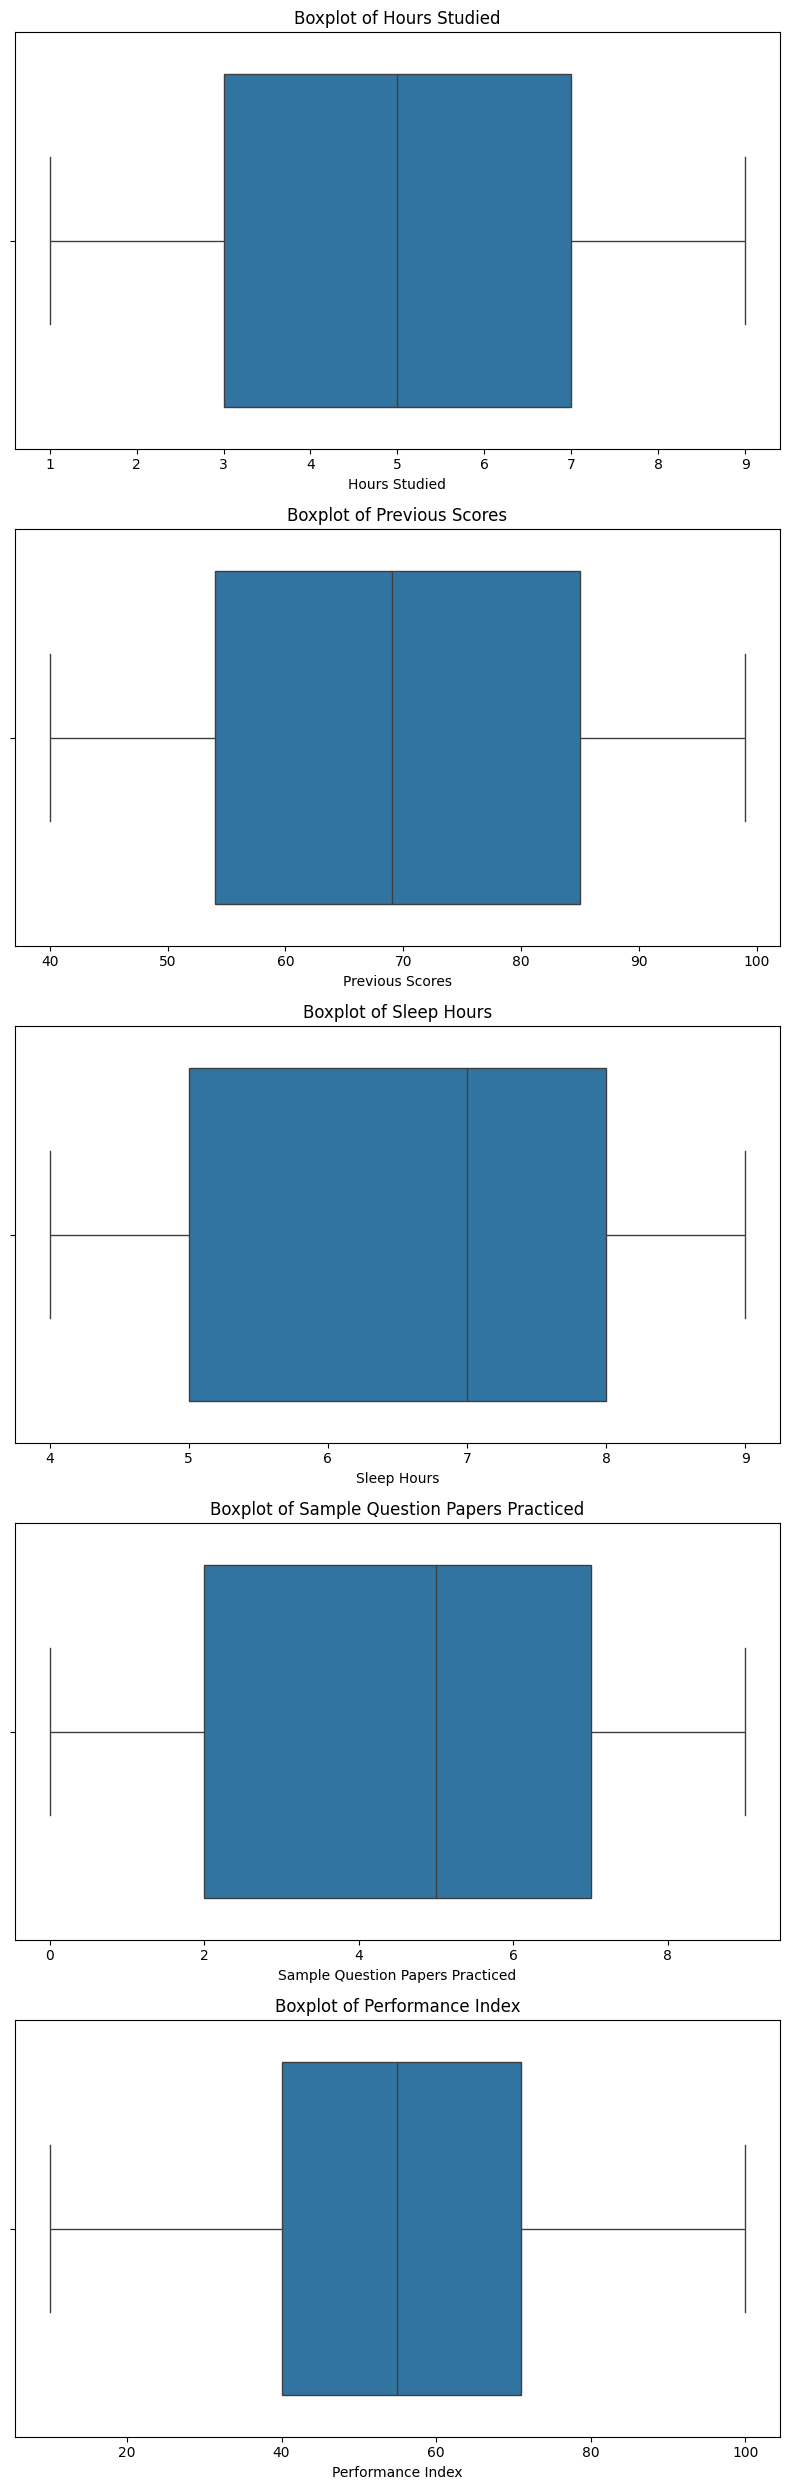

In [89]:
#set up the subplots
n = len(numeric_columns)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, 5*n))

#create the boxplots for each numeric column
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()


### There are no outliers in the dataset

## Data Quality Check

* Missing values: No null values found in the data set 
* Duplicates: we found **127 duplicated records** detected. Consider removing them for better model performance. 
* Outliers: No significant outliers found. The data distribution appears normal 


## Key Findings

1. The dataset is clean and does not contain any missing values. 
2. 127 duplicate entries exist, which may impact analysis and should be review
3. the absence of outliers ensures a stable data distribution, improving model reliability
4. The ** Extracurricular Activities ** column contains categorical data ('yes'/'no') and needs be mapped to numerical values (1 for 'yes', 0 for 'no') to prepare the data for model building. 

## Next Steps 

* Handle duplicate records by removing them for better model performance. 
* Map the ** Extracurricular Activities ** column values to numerical values before proceeding with further analysis or model building.  

## Cleaning the data 

**Removing the duplicates**

In [90]:
df = df[~df.duplicated()].reset_index(drop=True)
sum(df.duplicated())

0

## Exploratory Data Analysis (EDA)

In [91]:
Extra_Act = df['Extracurricular Activities'].value_counts().to_frame().reset_index()       
Extra_Act

,Extracurricular Activities,count
0,No,4986
1,Yes,4887


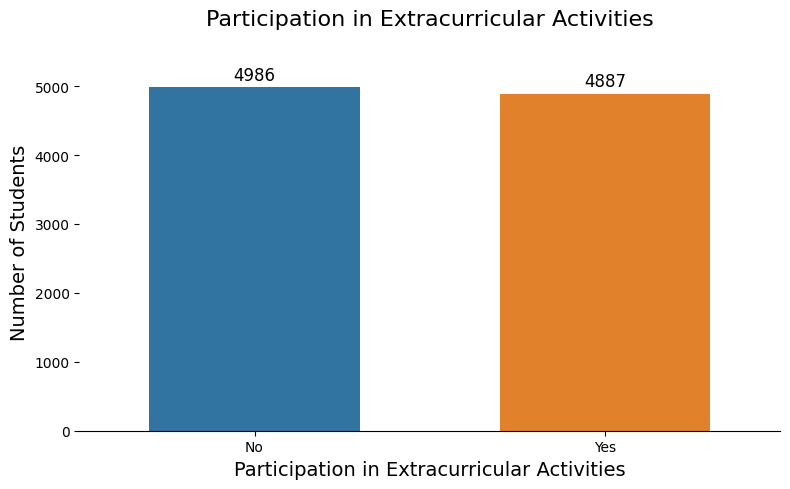

In [92]:
#create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Extracurricular Activities', y='count', data=Extra_Act, palette=['#1f77b4', '#ff7f0e'], width=0.6)
# Set the title and labels
plt.title('Participation in Extracurricular Activities', fontsize=16, pad=20)
plt.xlabel('Participation in Extracurricular Activities', fontsize=14) 
plt.ylabel('Number of Students', fontsize=14)

# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                color='black', xytext=(0, 9),  # 5 points vertical offset
                textcoords='offset points',fontsize=12)
    
# remove spines for cleaner look
sns.despine(left=True)

#adjust the y-axis limits to make a plot more balanced
plt.ylim(0, Extra_Act['count'].max() * 1.1)

plt.tight_layout()  

plt.show()

## Showing the relationships of between features and target 

**encoding **'Extracurricular Activities'** as numeric from categorical values to binary ( 0 and 1 ) for the heatmap

In [93]:
# Map 'Yes' to 1 and 'No' to 0
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Display the first few rows of the updated column
df['Extracurricular Activities'].head()

0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int64

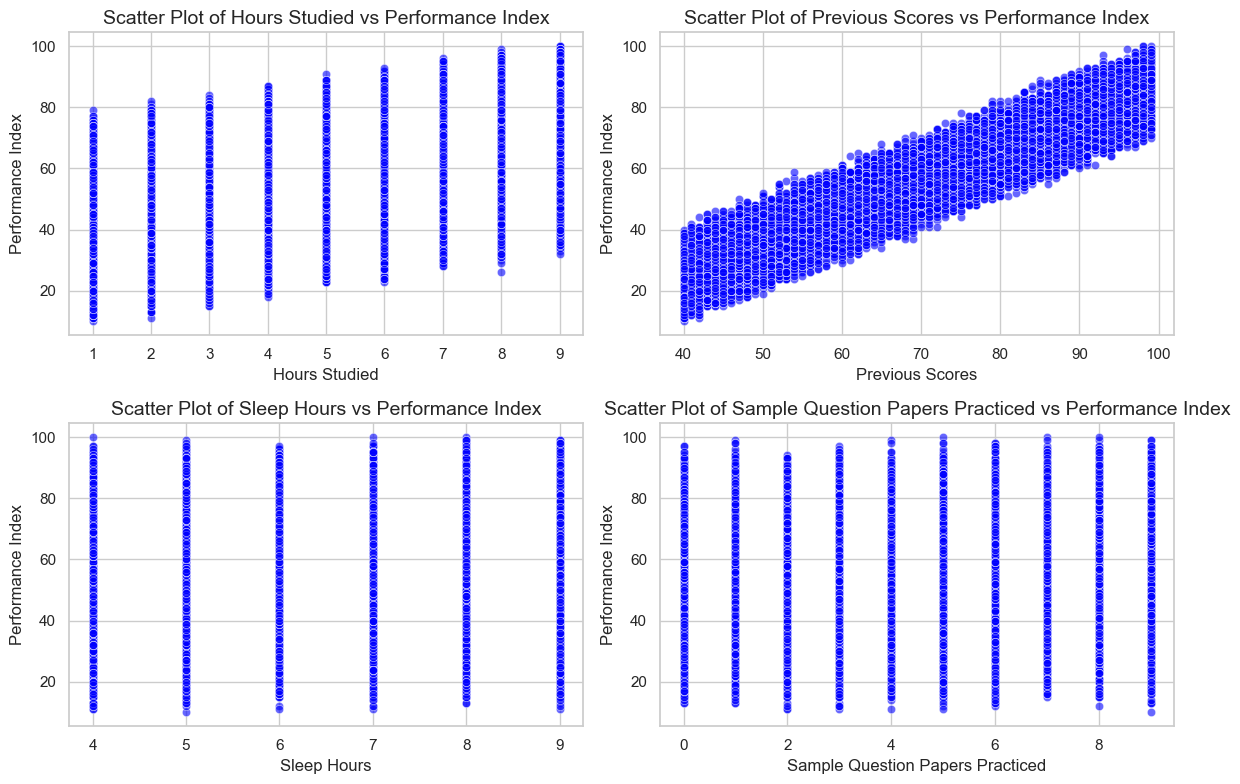

In [95]:
# define independent variables (excluding categorical columns 'Extracurricular Activities')
X_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
y_target = 'Performance Index'

# setup the figure
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Loop through each feature and create a scatter plot
for feature in X_features:
    plt.subplot(2, 2, X_features.index(feature) + 1)
    sns.scatterplot(data=df, x=feature, y=y_target, color='blue', alpha=0.6)
    plt.title(f'Scatter Plot of {feature} vs {y_target}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(y_target, fontsize=12)
    plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


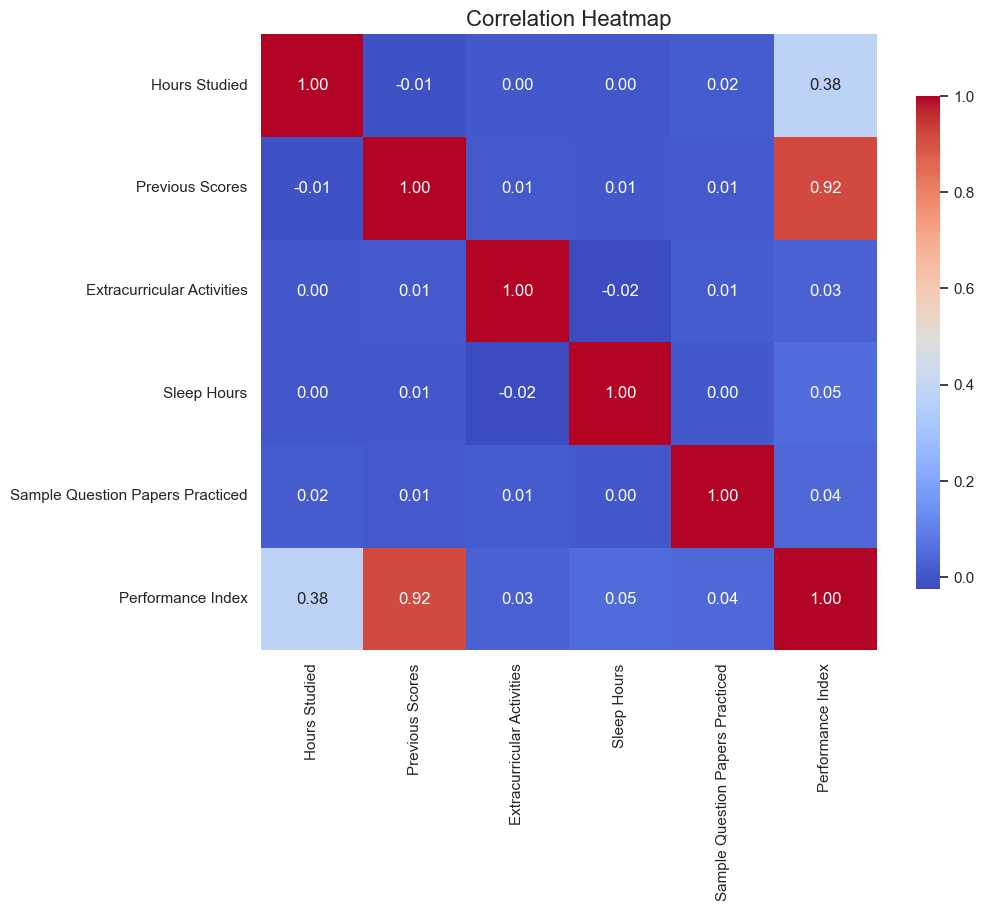

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap between variables', fontsize=16)
plt.show()

## Correlation Analysis Findings and Model Building Strategy 

### Key Correlation Insights
Based on the correlation matrix, several important relationships were identified. These insights will guide the feature selection and model development process: 

1. **Previous <--> Performance Index ( Correlation: 0.92)**
    * **Insight:** This is the strongest positive correlation in the dataset.
    * **Action: Previous Score** will be treated as the most influential predictor and prioritize during model training.

2. **Hours Studied <--> Performance Index ( Correlation: 0.375)**
    * **Insight:** A moderate Positive relationship exists.
    * **Action:** Include **Hours Studied** as a contributing factor in the model, as it adds predictive value.

3. **Extracurricular Activities <--> Performance Index ( Correlation: 0.03)**
    * **Insight:** A very weak correlation observed.
    * **Action:** Will be evaluated further, may be excluded if it adds little value.

4. **Sleep Hours <--> Performance Index ( Correlation: 0.050)**
    * **Insight:** weak correlation, suggesting limited impact on performance.
    * **Action:** Will be evaluated further, may be excluded if it adds little value.

5. **Sample Questions Papers Practiced <--> Performance Index ( Correlation: 0.043)**
    * **Insight:** Shows minimal influence on the target variable.
    * **Action:** Consider excluding unless further analysis reveals hidden predictive power.

--------------------------------------------------------------------------------------------------------------------------------------------------------

* ## Model Building Strategy

* **Primary Feature:** 
    * **Previous Scores** - Strongest predictor, will be a core input to the model.

* **Support Feature:**
    * **Hours Studied** - Add moderate predictive power; will be included

* ## Features for evaluation: 
    * **Extracurricular Activities**
    * **Sleep Hours**
    * **Sample Questions Papers Practiced**
    These will be tested for their impact during the model tuning. Features showing negligible influence will be excluded to optimize model performance.


--------------------------------------------------------------------------------------------------------------------------------------------------------








## Building The Model 


**Data Prep and Splitting** 

In [106]:
# Assuming df is your dataframe with the required columns
feature_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
target_column = 'Performance Index'

X = df[feature_columns]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [107]:
## Feature by feature training with standardScaler
# Initialize the StandardScaler

In [109]:
results = []

for i in range(2, len(feature_columns) + 1):
    current_features = feature_columns[:i]

    # subset the data
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data
    scaler.fit(X_train_subset)

    # Transform the training and testing data that needs to be scaled
    X_train_scaled = scaler.transform(X_train_subset)
    X_test_scaled = scaler.transform(X_test_subset)

    # Initialize the (SGDRegressor) stochastic gradient descent regressor 
    model = SGDRegressor()

    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled) 

    #Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results.append({
        'Features Used': current_features.copy(), 
        'R2 Score': r2, 
        'MSE': mse 
        })
    
# Convert results to DataFrame
results_df = pd.DataFrame(results)
# Display the results
results_df
    


,Features Used,R2 Score,MSE
0,"[Hours Studied, Previous Scores]",0.984995,5.584450
1,"[Hours Studied, Previous Scores, Sleep Hours]",0.986988,4.842551
2,"[Hours Studied, Previous Scores, Sleep Hours, ...",0.988038,4.451829


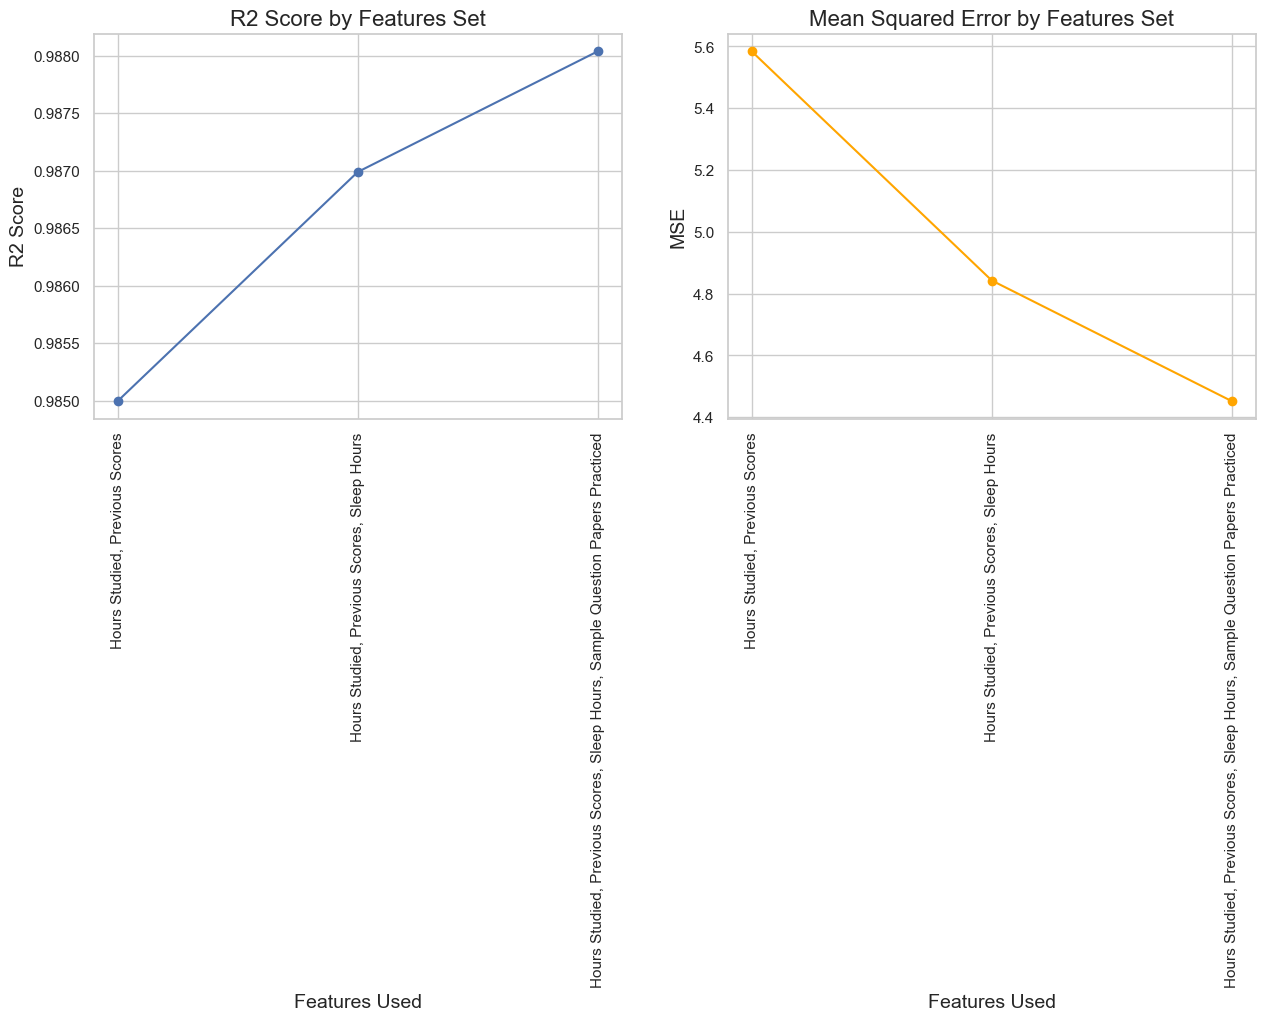

In [111]:
## Visualize the results

# create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


# plot the r2 scores on the first subplot
axes[0].plot(results_df['Features Used'].apply(lambda x: ', '.join(x)), results_df['R2 Score'], marker='o')
axes[0].set_title('R2 Score by Features Set', fontsize=16)
axes[0].set_xlabel('Features Used', fontsize=14)
axes[0].set_ylabel('R2 Score', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(True) 

# plot MSE scores on the second subplot
axes[1].plot(results_df['Features Used'].apply(lambda x: ', '.join(x)), results_df['MSE'], marker='o', color='orange')
axes[1].set_title('Mean Squared Error by Features Set', fontsize=16)
axes[1].set_xlabel('Features Used', fontsize=14)
axes[1].set_ylabel('MSE', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(True)


# Adjust layout for better spacing 
plt.tight_layout()

# show the plot
plt.show()



## Final Model insight: All Features Combined yield Best Performance
After evaluating the model performance by adding features incrementally, we observed a clear trend.

* **Using all five features** resulted in the **hightest R2 Score** and the **lowest Mean Squared Error (MSE)**.
* Each feature contributed marginally to improve the model, but the most impactful were:
    * **Previous Score** - Strongest single predictor of performance.
    * **Hours studied** - added meaningful support
* Features like **Extracurricular Activities, Sleep Hours, and Sample Questions Papers Practiced** showed only minor individual contributions, but when combined, they still enhanced the models accuracy slightly.

## Conclusion:

although some features have weak individual correlations with the target, including all features together allowed the model to capture more subtle patterns, leading to a better generalization and improved predictor power.

**Final Decision:** We will proceed with the model using **all available features**, as it consistently delivered the **best evaluation metrics.***

In [112]:
scaler = StandardScaler()
# Fit the scaler on the training data
X.train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SGDRegressor
model = SGDRegressor()
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

Mean Squared Error (MSE): 4.470064047656649
R2 Score: 0.9879890176470713


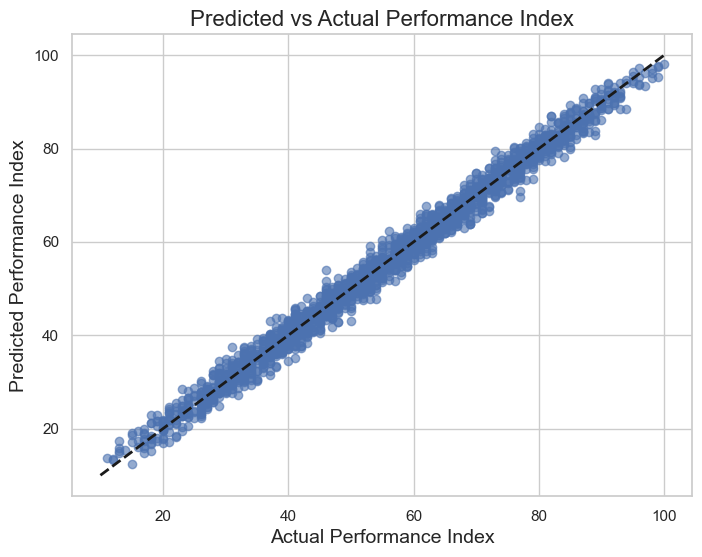

In [ ]:
# calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Performance Index', fontsize=14)
plt.ylabel('Predicted Performance Index', fontsize=14)
plt.title('Predicted vs Actual Performance Index', fontsize=16)
plt.grid(True)
plt.show()


Model Coefficients (Weights):
[ 7.40023121 17.6421398   0.72084409  0.52484565]
Model Intercept:
[55.07922051]
Number of iterations to converge:
7
Loss function Used:
squared_error
Learning rate (eta 0):
0.01
Feature names:
Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')


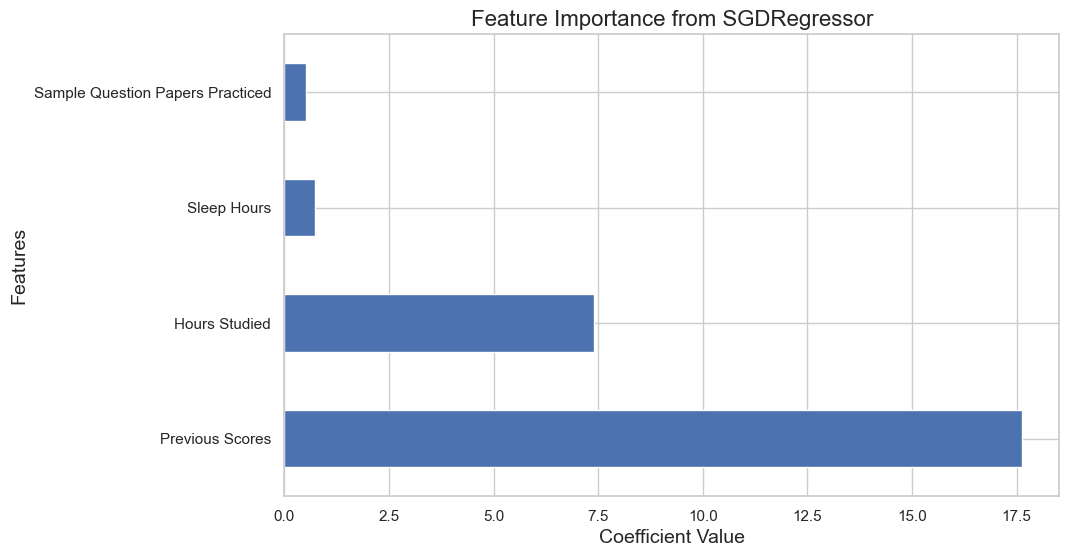

In [118]:
# Model coefficients (weights)
print("Model Coefficients (Weights):")
print(model.coef_)

# Model Intercept (Bias)
print("Model Intercept:")
print (model.intercept_)

# number of iterations to converge
print("Number of iterations to converge:")
print (model.n_iter_)

# Loss function used
print("Loss function Used:")
print (model.loss)

# Learning rate (eta 0)
print("Learning rate (eta 0):")
print (model.eta0)

# Feature names
print("Feature names:")
print (X_train.columns)
# Feature importance
importance = pd.Series(model.coef_, index=X_train.columns)
importance = importance.sort_values(ascending=False)
# Plotting feature importance
plt.figure(figsize=(10, 6))
importance.plot(kind='barh')
plt.title('Feature Importance from SGDRegressor', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True)
plt.show() 


